# COVID19 - US - Maps

Ana Cláudia Ramos Martins Abreu A80276

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

Load map layer

In [3]:
path = "C:\\Users\\Claudia\\Desktop\\Trabalho SIG\\mapa2.shp"
map_layer = QgsVectorLayer(path, 'USA map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Load csv layer

In [4]:
csv_path = "file:///C:/OSGeo4W64/bin/QGIS/Projeto Covid-19/us_covid19.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


JOIN map layer with csv layer

In [5]:
joinName = 'state'
targetName = 'STUSPS'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

### Positive Cases Distribution

Create a new layer to show the positive cases

In [8]:
positive_layer = map_layer.clone()
print(positive_layer)
positive_layer.setName("Casos Confirmados")

<QgsMapLayer: 'USA map' (ogr)>


In [7]:
from qgis.PyQt import QtGui

myOpacity = 1

myTargetField = 'Data_positive'
myRangeList = []

myMin = 0
myMax = 0
myLabel = '0'
myColour = QtGui.QColor('#e6e6ff')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 0
myMax = 1000
myLabel = '0-1000'
myColour = QtGui.QColor('#ff6666')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 1000
myMax = 10000
myLabel = '1000-10000'
myColour = QtGui.QColor('#ff3333')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 10000
myMax = 100000
myLabel = '10000-100000'
myColour = QtGui.QColor('#cc0000')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 100000
myMax = 500000
myLabel = '100000-500000'
myColour = QtGui.QColor('#990000')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 500000
myMax = 1000000
myLabel = '500000-1000000'
myColour = QtGui.QColor('#000000')
mySymbol = QgsSymbol.defaultSymbol(positive_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

positive_layer.setRenderer(myRenderer)

In [8]:
xt = map_layer.extent()
# print(xt)
width  = 1024
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))


project = QgsProject().instance()
project.addMapLayers([positive_layer])
manager = project.layoutManager()
layoutName = 'positive'
layouts_list = manager.printLayouts()
for layout in layouts_list:
    if layout.name() == layoutName:
        manager.removeLayout(layout)
        
layout = QgsPrintLayout(project)
layout.initializeDefaults()
layout.setName(layoutName)
manager.addLayout(layout)

pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map = QgsLayoutItemMap(layout)
map.setRect(20,20,20,20)
map.setLayers([positive_layer])



ms = QgsMapSettings()
ms.setLayers([positive_layer])
ms.setExtent(xt)
map.setExtent(xt)


layout.addLayoutItem(map)



map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map.setBackgroundColor(QColor(250,250,250))




legend = QgsLayoutItemLegend(layout)

legend.setReferencePoint(6)
legend.setScale(3)
legend.attemptMove(QgsLayoutPoint(0,height,QgsUnitTypes.LayoutMillimeters))

layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)

legend.setLinkedMap(map)

Gerar mapa com 1024 por 441


In [10]:
exporter = QgsLayoutExporter(manager.layoutByName("positive"))

#Se fizer render apenas uma vez o reference point continua a ser top left e não bottom left
image = exporter.renderPageToImage(0)
image = exporter.renderPageToImage(0)

from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('number_cases.png',"PNG")
Image( imgbuf.data() )

### Number of Deaths Distribution

In [11]:
death_layer = map_layer.clone()
print(death_layer)
death_layer.setName("Número de mortes")

<QgsMapLayer: 'USA map' (ogr)>


In [12]:
from qgis.PyQt import QtGui

myOpacity = 1

myTargetField = 'Data_death'
myRangeList = []

myMin = 0
myMax = 0
myLabel = '0'
myColour = QtGui.QColor('#CCE5FF')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 0
myMax = 100
myLabel = '0-100'
myColour = QtGui.QColor('#66b2ff')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 100
myMax = 1000
myLabel = '100-1000'
myColour = QtGui.QColor('#0080ff')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 1000
myMax = 10000
myLabel = '1000-10000'
myColour = QtGui.QColor('#0066cc')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 10000
myMax = 50000
myLabel = '10000-50000'
myColour = QtGui.QColor('#003366')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 50000
myMax = 100000
myLabel = '50000-100000'
myColour = QtGui.QColor('#001933')
mySymbol = QgsSymbol.defaultSymbol(death_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

death_layer.setRenderer(myRenderer)

In [13]:
xt = map_layer.extent()
# print(xt)
width  = 1024
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))


project = QgsProject().instance()
project.addMapLayers([death_layer])
manager = project.layoutManager()
layoutName = 'death'
layouts_list = manager.printLayouts()
for layout in layouts_list:
    if layout.name() == layoutName:
        manager.removeLayout(layout)
        
layout = QgsPrintLayout(project)
layout.initializeDefaults()
layout.setName(layoutName)
manager.addLayout(layout)

pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map = QgsLayoutItemMap(layout)
map.setRect(20,20,20,20)
map.setLayers([death_layer])



ms = QgsMapSettings()
ms.setLayers([death_layer])
ms.setExtent(xt)
map.setExtent(xt)


layout.addLayoutItem(map)



map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map.setBackgroundColor(QColor(250,250,250))




legend = QgsLayoutItemLegend(layout)

legend.setReferencePoint(6)
legend.setScale(3)
legend.attemptMove(QgsLayoutPoint(0,height,QgsUnitTypes.LayoutMillimeters))

layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)

legend.setLinkedMap(map)

Gerar mapa com 1024 por 441


In [14]:
exporter = QgsLayoutExporter(manager.layoutByName("death"))

#Se fizer render apenas uma vez o reference point continua a ser top left e não bottom left
image = exporter.renderPageToImage(0)
image = exporter.renderPageToImage(0)

from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('number_deaths.png',"PNG")
Image( imgbuf.data() )

### Distribution of number os recovered cases

In [15]:
recovered_layer = map_layer.clone()
print(recovered_layer)
recovered_layer.setName("Número de recuperados")

<QgsMapLayer: 'USA map' (ogr)>


In [16]:
from qgis.PyQt import QtGui

myOpacity = 1

myTargetField = 'Data_recovered'
myRangeList = []

myMin = 0
myMax = 0
myLabel = '0'
myColour = QtGui.QColor('#98FB98')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 0
myMax = 100
myLabel = '0-100'
myColour = QtGui.QColor('#90EE90')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 100
myMax = 1000
myLabel = '100-1000'
myColour = QtGui.QColor('#32CD32')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 1000
myMax = 10000
myLabel = '1000-10000'
myColour = QtGui.QColor('#8FBC8F')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 10000
myMax = 50000
myLabel = '10000-50000'
myColour = QtGui.QColor('#008000')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myMin = 50000
myMax = 100000
myLabel = '50000-100000'
myColour = QtGui.QColor('#006400')
mySymbol = QgsSymbol.defaultSymbol(recovered_layer.geometryType())
mySymbol.setColor(myColour)
myRange = QgsRendererRange(myMin, myMax, mySymbol, myLabel)
myRangeList.append(myRange)

myRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
myClassificationMethod = QgsApplication.classificationMethodRegistry().method("EqualInterval")
myRenderer.setClassificationMethod(myClassificationMethod)
myRenderer.setClassAttribute(myTargetField)

recovered_layer.setRenderer(myRenderer)

In [17]:
xt = map_layer.extent()
# print(xt)
width  = 1024
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))


project = QgsProject().instance()
project.addMapLayers([recovered_layer])
manager = project.layoutManager()
layoutName = 'death'
layouts_list = manager.printLayouts()
for layout in layouts_list:
    if layout.name() == layoutName:
        manager.removeLayout(layout)
        
layout = QgsPrintLayout(project)
layout.initializeDefaults()
layout.setName(layoutName)
manager.addLayout(layout)

pc = layout.pageCollection()
pc.page(0).attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map = QgsLayoutItemMap(layout)
map.setRect(20,20,20,20)
map.setLayers([recovered_layer])



ms = QgsMapSettings()
ms.setLayers([recovered_layer])
ms.setExtent(xt)
map.setExtent(xt)


layout.addLayoutItem(map)



map.attemptMove(QgsLayoutPoint(0,0,QgsUnitTypes.LayoutMillimeters))
map.attemptResize(QgsLayoutSize(width,height,QgsUnitTypes.LayoutMillimeters))


map.setBackgroundColor(QColor(250,250,250))




legend = QgsLayoutItemLegend(layout)

legend.setReferencePoint(6)
legend.setScale(3)
legend.attemptMove(QgsLayoutPoint(0,height,QgsUnitTypes.LayoutMillimeters))

layout.addLayoutItem(legend)
legend.setLegendFilterByMapEnabled(True)

legend.setLinkedMap(map)

Gerar mapa com 1024 por 441


In [18]:
exporter = QgsLayoutExporter(manager.layoutByName("death"))

#Se fizer render apenas uma vez o reference point continua a ser top left e não bottom left
image = exporter.renderPageToImage(0)
image = exporter.renderPageToImage(0)

from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('number_recovered.png',"PNG")
Image( imgbuf.data() )

### Presentation of the number of confirmed cases in each state

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image


In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:\\OSGeo4W64\\apps\\qgis/./svg/
		C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/Claudia/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/Claudia/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [3]:
path = "C:\\Users\\Claudia\\Desktop\\Trabalho SIG\\mapa2.shp"
map_layer = QgsVectorLayer(path, 'USA map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")
    
    
csv_path = "file:///C:/OSGeo4W64/bin/QGIS/Projeto Covid-19/us_states_covid19_daily_original.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")
    
QgsProject.instance().addMapLayer(map_layer)
QgsProject.instance().addMapLayer(csv_layer)
csv_iso='state'
shp_iso='STUSPS'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csv_iso)
joinObject.setTargetFieldName(shp_iso)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(csv_layer)
map_layer.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('USA map')[0]

# Checking if all columns were uploaded
for field in vlayer.fields():
    print("Column "+field.name()+" Load")

Sucess
Sucess
Column REGION Load
Column DIVISION Load
Column STATEFP Load
Column STATENS Load
Column GEOID Load
Column STUSPS Load
Column NAME Load
Column LSAD Load
Column MTFCC Load
Column FUNCSTAT Load
Column ALAND Load
Column AWATER Load
Column INTPTLAT Load
Column INTPTLON Load
Column Data_date Load
Column Data_positive Load
Column Data_negative Load
Column Data_pending Load
Column Data_hospitalizedCurrently Load
Column Data_hospitalizedCumulative Load
Column Data_inIcuCurrently Load
Column Data_inIcuCumulative Load
Column Data_onVentilatorCurrently Load
Column Data_onVentilatorCumulative Load
Column Data_recovered Load
Column Data_dataQualityGrade Load
Column Data_lastUpdateEt Load
Column Data_hash Load
Column Data_dateChecked Load
Column Data_death Load
Column Data_hospitalized Load
Column Data_total Load
Column Data_totalTestResults Load
Column Data_posNeg Load
Column Data_fips Load
Column Data_deathIncrease Load
Column Data_hospitalizedIncrease Load
Column Data_negativeIncrease

In [4]:
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 12))
text_format.setSize(12)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Data_positive"
layer_settings.placement = 2

layer_settings.enabled = True

label_settings = QgsVectorLayerSimpleLabeling(layer_settings)


vlayer.setLabeling(label_settings)
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

Gerar mapa com 2000 por 862


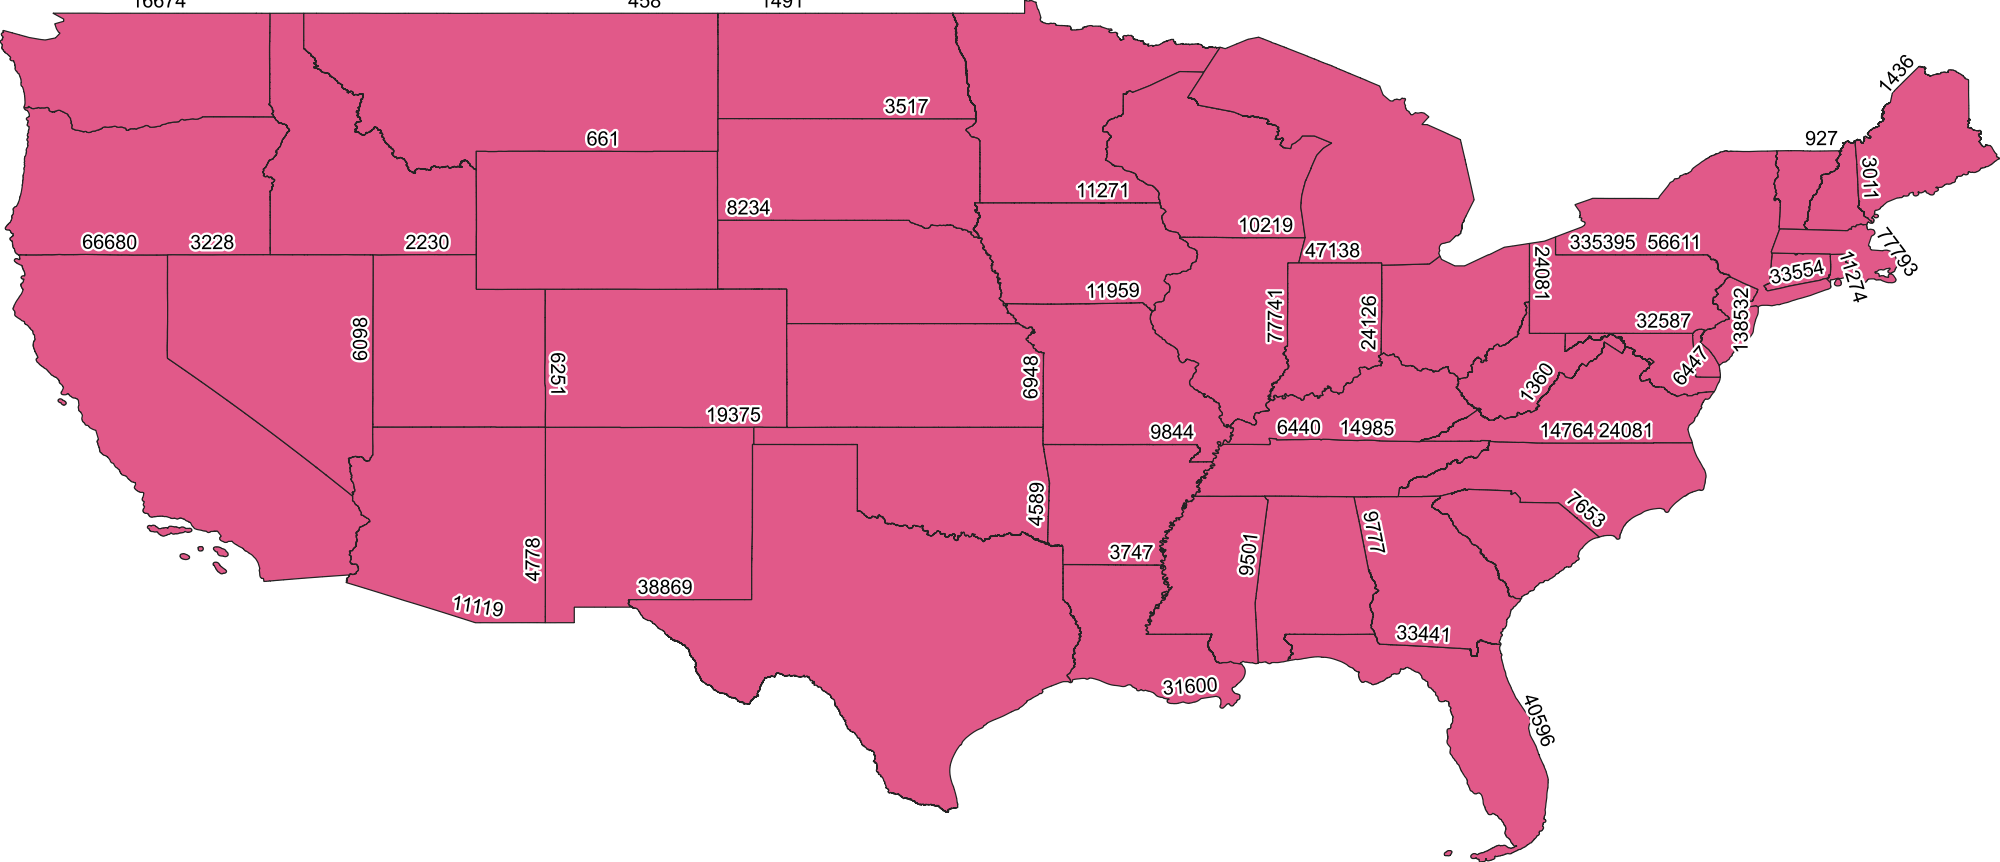

In [5]:

xt = vlayer.extent()
#print(xt)

width  = 2000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('number_cases_2.png',"PNG")
Image( imgbuf.data() )

### Presentation of the number of deaths in each state

In [6]:
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 12))
text_format.setSize(12)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Data_death"
layer_settings.placement = 2

layer_settings.enabled = True

label_settings = QgsVectorLayerSimpleLabeling(layer_settings)


vlayer.setLabeling(label_settings)
vlayer.setLabelsEnabled(True)
vlayer.triggerRepaint()

Gerar mapa com 2000 por 862


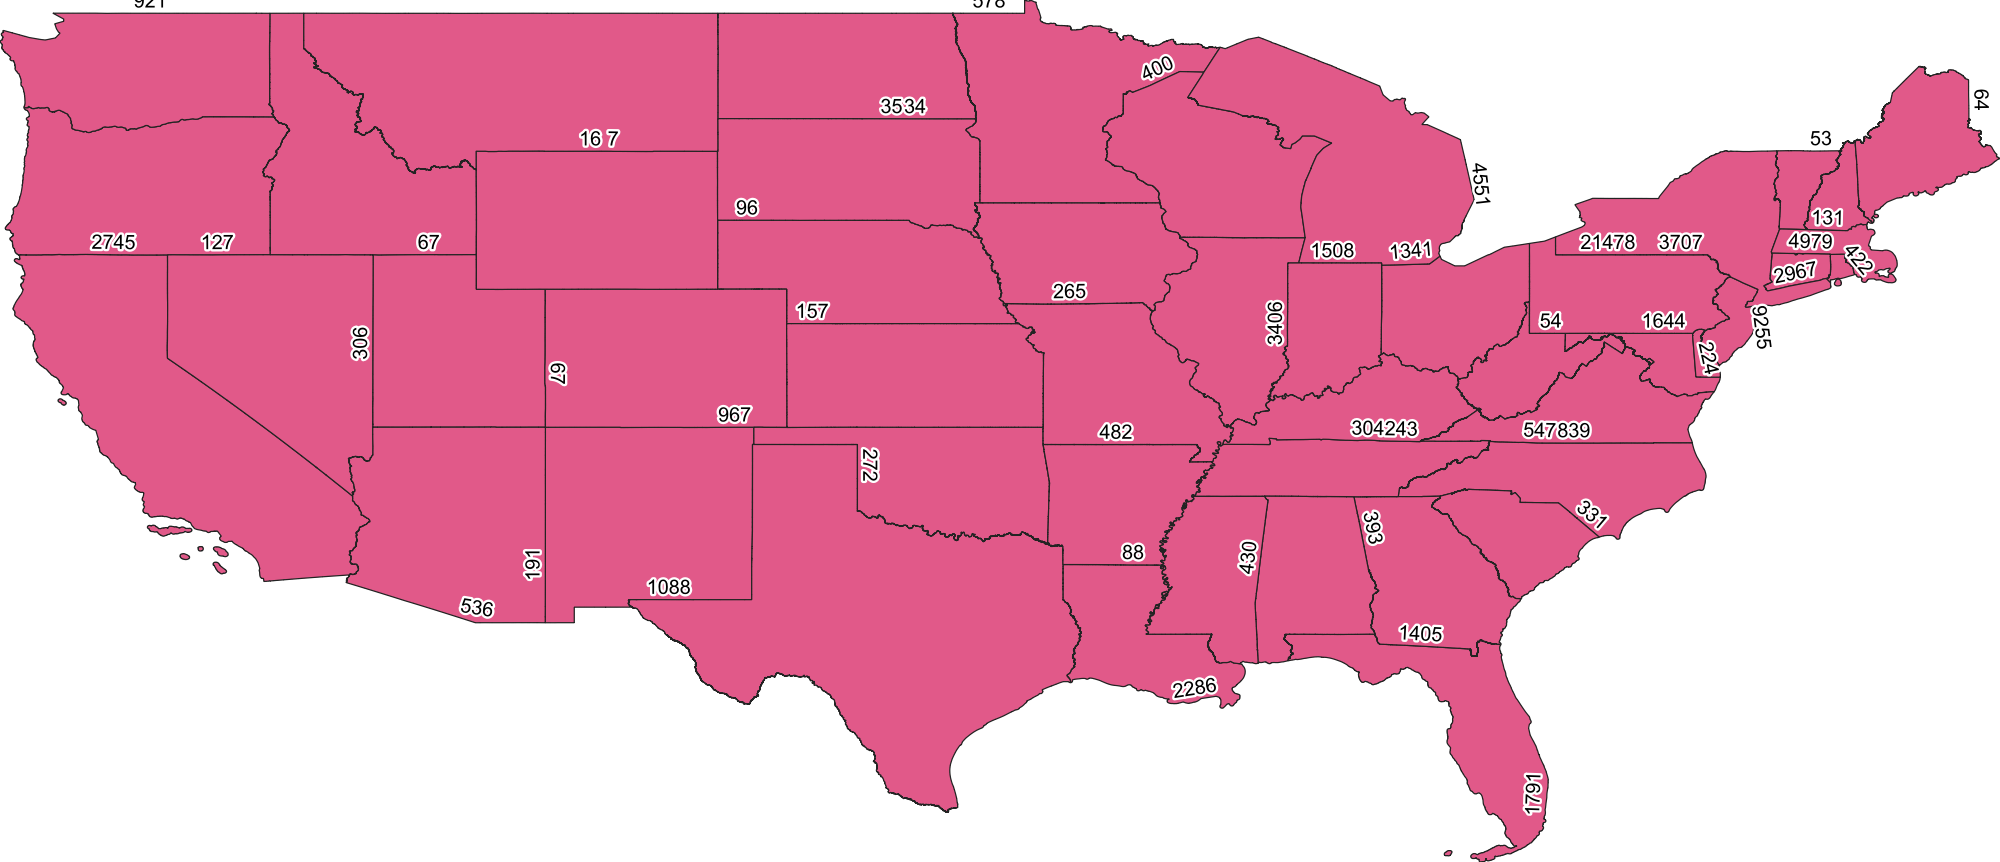

In [7]:
xt = vlayer.extent()
#print(xt)

width  = 2000
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('number_deaths_2.png',"PNG")
Image( imgbuf.data() )